<a href="https://colab.research.google.com/github/ANUPAMAMEHRA/BERT-Sentiment-analysis-with-star-rating-/blob/main/clothing_review_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.4MB/s eta 0:13:47tcmalloc: large alloc 1147494400 bytes == 0x557a369b0000 @  0x7f02cc966615 0x5579fd6a1cdc 0x5579fd78152a 0x5579fd6a4afd 0x5579fd795fed 0x5579fd718988 0x5579fd7134ae 0x5579fd6a63ea 0x5579fd7187f0 0x5579fd7134ae 0x5579fd6a63ea 0x5579fd71532a 0x5579fd796e36 0x5579fd714853 0x5579fd796e36 0x5579fd714853 0x5579fd796e36 0x5579fd714853 0x5579fd796e36 0x5579fd8193e1 0x5579fd7796a9 0x5579fd6e4cc4 0x5579fd6a5559 0x5579fd7194f8 0x5579fd6a630a 0x5579fd7143b5 0x5579fd7137ad 0x5579fd6a63ea 0x5579fd7143b5 0x5579fd6a630a 0x5579fd7143b5
     |█████████████████               | 1055.7MB 1.2MB/s eta 0:12:38tcmalloc: large alloc 1434370048 bytes == 0x557a7b006000 @  0x7f02cc966615 0x5579fd6a1cdc 0x5579fd78152a 0x5579fd6a4afd 0x5579fd795fed 0x5579fd718988 0x5579fd7134ae 0x5579fd6a63ea 0x5579fd7187f0 0x5579fd7134ae 0x5579fd6a63ea 0x5579fd71532a 0x5579fd796e36 0x5579fd714853 0

In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

     |████████████████████████████████| 2.5MB 8.0MB/s 
     |████████████████████████████████| 3.3MB 50.4MB/s 
     |████████████████████████████████| 901kB 45.9MB/s 


In [3]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')


BERT, which stands for Bidirectional Encoder Representations from Transformers. Also used by Google in Google search.

In [5]:
# this is Pre Trained Model based on BERT which you can download from huggingface 
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [28]:
tokens = tokenizer.encode('This Dress is really beautiful and fits me well', return_tensors= 'pt')
tokens

tensor([[  101, 10372, 46836, 10127, 25165, 20524, 10110, 20599, 10107, 10525,
         11327,   102]])

In [30]:
tokenizer.decode(tokens[0])

'[CLS] this dress is really beautiful and fits me well [SEP]'

In [31]:
result= model(tokens)
result

SequenceClassifierOutput([('logits',
                           tensor([[-2.8263, -2.8639, -0.6539,  1.9846,  3.4310]],
                                  grad_fn=<AddmmBackward>))])

In [34]:
# The output from the model is one-hot encoded list of scores . 
# The position with hihest score represents the sentiment rating
result.logits

tensor([[-2.8263, -2.8639, -0.6539,  1.9846,  3.4310]],
       grad_fn=<AddmmBackward>)

In [35]:
# To get the Ratings between 1 to 5 we 
int(torch.argmax(result.logits))+1

5

In [6]:
women_clothing = pd.read_excel( '/content/Womens Clothing Reviews Data.xlsx' )
women_clothing.rename(columns = {'Review Title' : 'Review_Title', 'Review Text' : 'Review_Text'}, inplace = True)
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review_Title,Review_Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
 def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [8]:
sentiment_score(women_clothing['Review_Text'].iloc[2])

3

In [9]:
women_clothing.dropna(subset = ['Review_Text'],inplace=True)

In [10]:
women_clothing.reset_index(drop = True, inplace= True)

In [15]:
women_clothing['Sentiment_rating'] = women_clothing['Review_Text'].apply(lambda x: sentiment_score(x[:512]))
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review_Title,Review_Text,Rating,Recommend Flag,Sentiment_rating
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,5
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,5
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,3
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,5
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,5


In [16]:
women_clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product ID        22641 non-null  int64 
 1   Category          22628 non-null  object
 2   Subcategory1      22628 non-null  object
 3   SubCategory2      22628 non-null  object
 4   Location          22641 non-null  object
 5   Channel           22641 non-null  object
 6   Customer Age      22641 non-null  int64 
 7   Review_Title      19675 non-null  object
 8   Review_Text       22641 non-null  object
 9   Rating            22641 non-null  int64 
 10  Recommend Flag    22641 non-null  int64 
 11  Sentiment_rating  22641 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


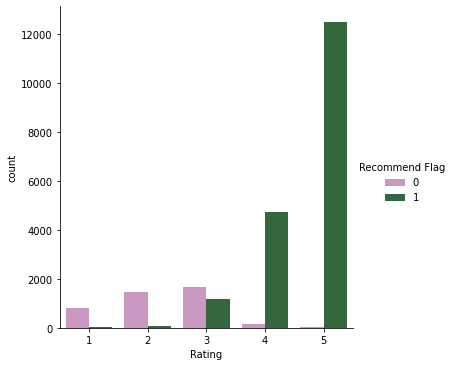

In [26]:
g = sns.catplot(x="Rating", hue="Recommend Flag",
                data=women_clothing, kind="count", palette= "cubehelix_r" )

from above graph we can interpret that Ratings are decent measure for Recommendation of clothing item, like mostly Rating above 3 have higher recommendation rate, Rating below 3 have lower recommendation rate and lastly Rating equal 3 are quite Neutral as Recommendation rate is confusing for this Category.

In [18]:
women_clothing["Bert_Sentiment"] = np.where(women_clothing.Sentiment_rating  == 3, "Neutral",np.where(women_clothing.Sentiment_rating < 4, "Negative", "Positive"))
women_clothing.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review_Title,Review_Text,Rating,Recommend Flag,Sentiment_rating,Bert_Sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,5,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,5,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,3,Neutral
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,5,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,5,Positive


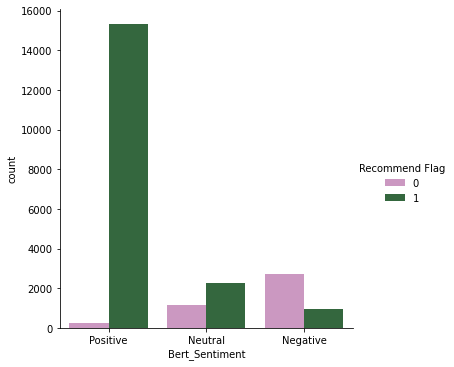

In [27]:
g = sns.catplot(x="Bert_Sentiment", hue="Recommend Flag",
                data=women_clothing, kind="count", palette= "cubehelix_r" )

If we consider Recommend flag and above graph then we can see that BERT did pretty good job in predicting the sentiments for most of the Reviews 

In [20]:
# storing file with sentiment data in one csv file for further analysis
women_clothing.to_csv('women_clothing_sentiment.csv',index=None,header=True)